
# Problem Statement: Fake News Classification
Design and implement a machine learning model to classify news articles as either real or fake. The objective of this project is to build an accurate and robust classification system that can distinguish between genuine and fabricated news sources.

## Background:
In the era of digital media, the spread of misinformation and fake news has become a significant challenge. False information can easily go viral and influence public opinion, leading to adverse consequences for society. To combat this issue, it is crucial to develop an automated system that can identify and flag potential fake news articles, helping users make informed decisions about the information they consume.

## Dataset:
We'll be using a dataset containing a collection of news articles from various sources. Each article will be tagged as either "real" or "fake" to serve as the ground truth for training the model.
dataset was found on kaggle: https://www.kaggle.com/datasets/hassanamin/textdb3


## Steps Taken:

1. Exploring and Preparing dataset
2. Preprocessing
3. Feature Extraction: (TF-IDF)
4. Model Building: (SVM,RF,NAIVE BAYES)
5. Evaluation: ( Accuracy Score, Confusion Matrix, Classification Report)
6. Conclusion    






## Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
import nltk 
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, naive_bayes
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay



c:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# 1. Loading and preparing data

In [5]:
#Load dataset
df = pd.read_csv('fake_or_real_news.csv')
df.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


now after loading the dataset let's explore it to better understand it:
1. we need to drop the first column (Unnamed: 0) as we won't be needing it.
2. each news row is labeled eather by Fake or Real in the label column, we need to change that to 0 and 1.
3. check for null and missing values in dataset.
4. explore if dataset is balanced.

Checking the balance of our dataset

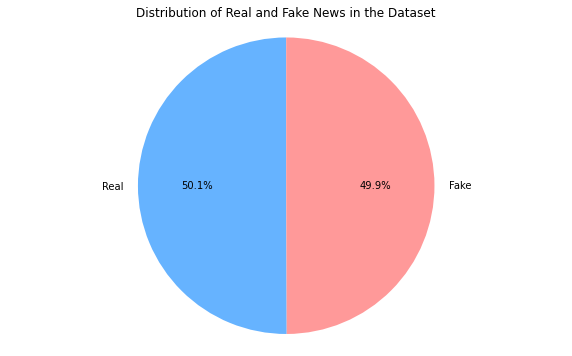

In [6]:
fig = plt.figure(figsize=(10, 6))
labels = 'Real', 'Fake'
counts = df.label.value_counts().values
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Real and Fake News in the Dataset')
plt.axis('equal')
plt.show()

After visualizing the distribution of the two classes, we can see that the dataset is balanced, that will help preventing the model from becoming biased towards one class.

In [7]:
df['text'][0]


'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that the entir

As you can see the text field have so too long, and have so many informations, so it can be valuable for detecting the realness of the article, but for the purpose of our project we'll be just looking at news titles to speed up the process, so we'll be dropping the text column.

In [8]:
df = df.drop(['Unnamed: 0','text'], axis=1)
df.head()

,title,label
0,You Can Smell Hillary’s Fear,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE
2,Kerry to go to Paris in gesture of sympathy,REAL
3,Bernie supporters on Twitter erupt in anger ag...,FAKE
4,The Battle of New York: Why This Primary Matters,REAL


In [9]:
df['label'].replace({'FAKE': 1, 'REAL': 0}, inplace=True)
df.head()

,title,label
0,You Can Smell Hillary’s Fear,1
1,Watch The Exact Moment Paul Ryan Committed Pol...,1
2,Kerry to go to Paris in gesture of sympathy,0
3,Bernie supporters on Twitter erupt in anger ag...,1
4,The Battle of New York: Why This Primary Matters,0


In [10]:
df.isnull().sum()

title    0
label    0
dtype: int64

The dataset doesn't have any null values.

# 2. Preprocessing

Tokenization, Lowercase, Remove Stopwords, Stemming, Lemmatization.

In [11]:
lm = WordNetLemmatizer()
corpus = [ ]
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['title'][i])
    review = review.lower()
    review = review.split()
    review = [lm.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [12]:

print(df['title'][1])
corpus[1]

Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)


'watch exact moment paul ryan committed political suicide trump rally video'

# 3. Feature Extraction: (TF-IDF)

In [13]:
tf = TfidfVectorizer()
x = tf.fit_transform(corpus).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
y = df['label']

### Splitting into Training and Testing data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10,stratify=y)

In [16]:
len(X_train), len(X_test), len(y_train), len(y_test)

(4434, 1901, 4434, 1901)

# 4. Model Building

In [17]:
#Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
#SVM classifier 
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [19]:
#Naive Bayes Classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train, y_train)


MultinomialNB()

# 5. Evaluation

In [20]:
#Evalution utility class for fake news detection models
class Evaluation:
    
    def __init__(self,model,X_train,X_test,y_train,y_test):
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        
    def train_evaluation(self):
        y_pred_train = self.model.predict(self.X_train)
        
        acc_scr_train = accuracy_score(self.y_train,y_pred_train)
        print("Accuracy Score On Training Data Set :",acc_scr_train)
        print()
        
        con_mat_train = confusion_matrix(self.y_train,y_pred_train)

        print("Confusion Matrix On Training Data Set :\n",con_mat_train)
        print()
        con_mat_display =  ConfusionMatrixDisplay(confusion_matrix=con_mat_train,display_labels=['FAKE','REAL'])
        con_mat_display.plot()
        plt.show()
        
        class_rep_train = classification_report(self.y_train,y_pred_train)
        print("Classification Report On Training Data Set :\n",class_rep_train)
        
        
    def test_evaluation(self):
        y_pred_test = self.model.predict(self.X_test)
        
        acc_scr_test = accuracy_score(self.y_test,y_pred_test)
        print("Accuracy Score On Testing Data Set for  :",acc_scr_test)
        print()
        
        con_mat_test = confusion_matrix(self.y_test,y_pred_test)
        con_mat_display =  ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=['FAKE','REAL'])
        con_mat_display.plot()
        plt.show()
        print()

        
        class_rep_test = classification_report(self.y_test,y_pred_test)
        print("Classification Report On Testing Data Set :\n",class_rep_test)
        
        

RF evaluation
Accuracy Score On Testing Data Set for  : 0.8043135192004208



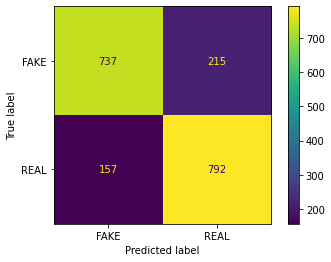


Classification Report On Testing Data Set :
               precision    recall  f1-score   support

           0       0.82      0.77      0.80       952
           1       0.79      0.83      0.81       949

    accuracy                           0.80      1901
   macro avg       0.81      0.80      0.80      1901
weighted avg       0.81      0.80      0.80      1901



In [21]:
# RF predict 
y_pred_rf = rf.predict(X_test)
print("RF evaluation")
Evaluation(rf,X_train, X_test, y_train, y_test).test_evaluation()



SVM evaluation
Accuracy Score On Testing Data Set for  : 0.8285113098369279



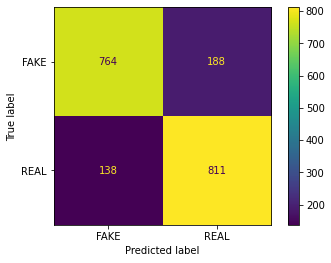


Classification Report On Testing Data Set :
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       952
           1       0.81      0.85      0.83       949

    accuracy                           0.83      1901
   macro avg       0.83      0.83      0.83      1901
weighted avg       0.83      0.83      0.83      1901



In [22]:
y_pred_svm = clf.predict(X_test)
print('SVM evaluation')
Evaluation(clf,X_train, X_test, y_train, y_test).test_evaluation()



NAIVE BAYES evaluation
Accuracy Score On Testing Data Set for  : 0.8011572856391374



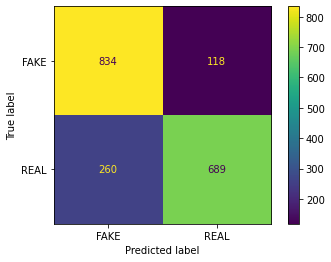


Classification Report On Testing Data Set :
               precision    recall  f1-score   support

           0       0.76      0.88      0.82       952
           1       0.85      0.73      0.78       949

    accuracy                           0.80      1901
   macro avg       0.81      0.80      0.80      1901
weighted avg       0.81      0.80      0.80      1901



In [23]:
y_pred_naive = Naive.predict(X_test)
print('NAIVE BAYES evaluation')
Evaluation(Naive,X_train, X_test, y_train, y_test).test_evaluation()


# hyperparameter tuning

Tried to do some hyperparameter tuning for each model, all the models except the randomforestclassifier had the same accuracy as before. the hyperparameter tuning of the RF classifier didn't go well as it required alot of time, I'll look for a solution for this in the future. 

# 6. Conclusion

After the evaluation we can find that the two models SVM and NAIVE BAYES performed pretty well in comparison to the randomforestclassifier.
The confusion matrix showing that even though the Naive bayes has lower accuracy than the SVM model, it had lower false positives.

What can we do to make it better ?
  In the process of detecting if a Post/tweet/message/Article/news is fake or real, there's many other factors to look into beside the text title that we treated in our case, among which:
    - Source of information Website/Profile, is it reliable ?
    - users Reports (users can report that post)
    - Frequency of the same information on the internet ('retweets','reposts','similarities')
    - And many more ...
  
  Do hyperparameters tuning to find the parameters that produces the best accuracy.
  We can try Deeplearning Algorithms and see how it will perform.   



# Prediction Pipeline

In [28]:
class Preprocessing:
    
    def __init__(self,data):
        self.data = data
        
    def text_preprocessing_user(self):
        lm = WordNetLemmatizer()
        pred_data = [self.data]    
        preprocess_data = []
        for data in pred_data:
            review = re.sub('^a-zA-Z0-9',' ', data)
            review = review.lower()
            review = review.split()
            review = [lm.lemmatize(x) for x in review if x not in stopwords.words('english')]
        
            review = " ".join(review)
            preprocess_data.append(review)
        return preprocess_data    


In [29]:
data = 'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'
Preprocessing(data).text_preprocessing_user()

['flynn: hillary clinton, big woman campus - breitbart']

In [32]:
class Prediction:
    
    def __init__(self,pred_data, model):
        self.pred_data = pred_data
        self.model = model
        
    def prediction_model(self):
        preprocess_data = Preprocessing(self.pred_data).text_preprocessing_user()
        data = tf.transform(preprocess_data).toarray()
        prediction = self.model.predict(data)
        
        if prediction [0] == 0 :
            return "The News Is Fake"
        
        else:
            return "The News Is Real"

In [44]:
print(df['title'][10],df['label'][10])
headLine = df['title'][10]
Prediction(headLine,clf).prediction_model()

With all three Clintons in Iowa, a glimpse at the fire that has eluded Hillary Clinton’s campaign 0


'The News Is Fake'

In [46]:
print(df['title'][44],df['label'][44])
headLine = df['title'][44]
Prediction(headLine,clf).prediction_model()

With 3:20 a.m. tweet storm Saturday, Clinton continues to mock Trump’s Friday ‘meltdown’ 0


'The News Is Fake'

In [48]:
print(df['title'][441],df['label'][441])
headLine = df['title'][441]
Prediction(headLine,clf).prediction_model()

2 deaths possibly linked to 'superbug' at UCLA hospital after 7 infected, 179 exposed 0


'The News Is Fake'

In [53]:
df[df['label'] == 0]

,title,label
2,Kerry to go to Paris in gesture of sympathy,0
4,The Battle of New York: Why This Primary Matters,0
7,‘Britain’s Schindler’ Dies at 106,0
8,Fact check: Trump and Clinton at the 'commande...,0
9,Iran reportedly makes new push for uranium con...,0
...,...,...
6324,Alabama Lawmaker: Same-Sex Couples Don’t Deser...,0
6327,GOP Senator David Perdue Jokes About Praying f...,0
6330,State Department says it can't find emails fro...,0
6333,"In Ethiopia, Obama seeks progress on peace, se...",0


In [54]:
print(df['title'][6324],df['label'][6324])
headLine = df['title'][6324]
Prediction(headLine,clf).prediction_model()

Alabama Lawmaker: Same-Sex Couples Don’t Deserve Same Financial Benefits As Other Families 0


'The News Is Real'

In [55]:
print(df['title'][9	],df['label'][9	])
headLine = df['title'][9	]
Prediction(headLine,clf).prediction_model()

Iran reportedly makes new push for uranium concessions in nuclear talks 0


'The News Is Fake'

# Final Conclusion

After testing the model with news outside our dataset, and news from the dataset, it turns out that the model is not accurate, therefore it can't be reliable.

Few Reasons that comes to mind for its low accuracy in predicting: 
 - We only used titles to train it.
 - Model used for predicting is not compatible with our problem, so we might consider testing other models or playing with the parameters.
 - We need to have more factors for detecting the fakeness of a post as it turns out title alone is not enough.
 

This project serves as a learning and practicing playground for me, where i tried to experiment some nlp techniques to try and solve a real word problem.